# Reproduce Plots as Shown in the Paper

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Embedding Model Performance - Training and Validation

In [26]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
result_log_path = os.path.join(parent_dir, "active_learning_results", "results_log.csv")

result_log = pd.read_csv(result_log_path, sep=", ")
rounds_df = result_log[result_log["round_num"].isin(['0', '1', '2', '3', '4'])]
rounds_df.head()

/var/folders/b1/6p4sk8f166d1j8xr27c9vfxm0000gp/T/ipykernel_62274/4271695601.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result_log = pd.read_csv(result_log_path, sep=", ")


,round_num,train_accuracy,train_f1,eval_accuracy,eval_f1,test_accuracy,test_f1
0,0,0.8587,0.5455,0.6972,0.0444,",",NaN
1,1,0.9031,0.5974,0.8500,0.1429,",",NaN
2,2,0.9000,0.5789,0.9000,0.2000,",",NaN
4,3,0.9583,0.7241,0.8438,0.1176,0.8833,0.0000
5,4,0.9167,0.6364,0.7292,0.1875,0.8767,0.1395


/var/folders/b1/6p4sk8f166d1j8xr27c9vfxm0000gp/T/ipykernel_62274/2984548644.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(4, final_model_test_f1, 'ro', label="Test F1", color="green")


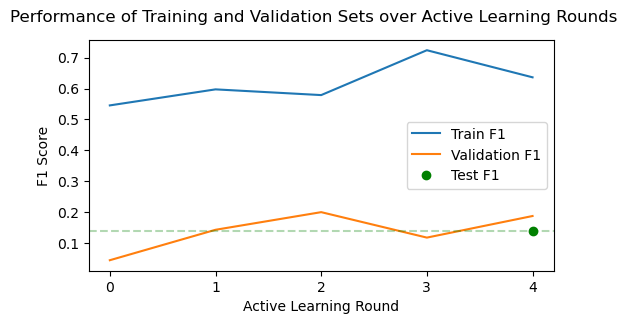

In [27]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
fig, ax2 = plt.subplots(1, 1, figsize=(6, 3))
fig.suptitle("Performance of Training and Validation Sets over Active Learning Rounds")

# add dot of final model test score:
final_model_test_accuracy = 0.8767
final_model_test_f1 = 0.1395

# add accuracy to ax1:
# sns.lineplot(data=rounds_df, x="round_num", y="train_accuracy", label="Train Accuracy", ax=ax1)
# sns.lineplot(data=rounds_df, x="round_num", y="eval_accuracy", label="Validation Accuracy", ax=ax1)
# ax1.plot(4, final_model_test_accuracy, 'ro', label="Test Accuracy", color="green")
# ax1.axhline(y=final_model_test_accuracy, color='green', linestyle='--', alpha=0.3)
# ax1.set_xlabel("Active Learning Round")
# ax1.set_ylabel("Accuracy")
# ax1.legend()

# add f1 to ax2:
sns.lineplot(data=rounds_df, x="round_num", y="train_f1", label="Train F1", ax=ax2)
sns.lineplot(data=rounds_df, x="round_num", y="eval_f1", label="Validation F1", ax=ax2)
ax2.plot(4, final_model_test_f1, 'ro', label="Test F1", color="green")
ax2.axhline(y=final_model_test_f1, color='green', linestyle='--', alpha=0.3)
ax2.set_xlabel("Active Learning Round")
ax2.set_ylabel("F1 Score")
ax2.legend()

plt.show()


## Confusion Matrix Active Learning Rounds

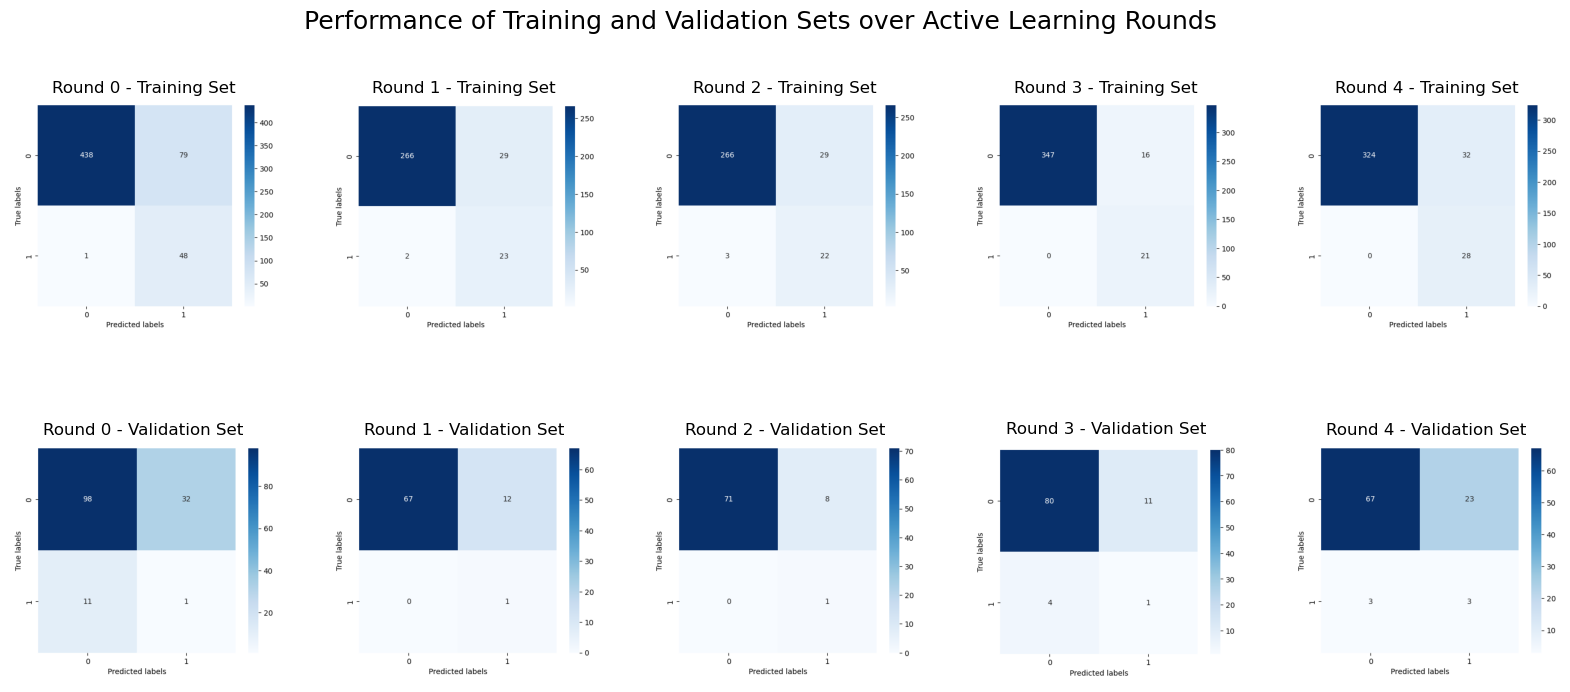

In [22]:
base_dir = os.path.dirname(os.getcwd())
fig, axs = plt.subplots(2,5, figsize=(20, 8))
fig.suptitle("Performance of Training and Validation Sets over Active Learning Rounds", fontsize=18)
fig.subplots_adjust(top=0.9)

for r in range(0, 5):
    for i,t in enumerate(["train", "eval"]):
        img = Image.open(base_dir + "/active_learning_results/round" + str(r) + "_" + t + ".png")
        name = "Training Set" if t == "train" else "Validation Set"
        axs[i,r].imshow(img)
        axs[i,r].axis("off")
        axs[i,r].set_title("Round " + str(r) + " - " + name)

plt.show()

## Image Examples

In [ ]:
queries_interesting = ["114_dd2dcd98.jpg", "539_897f21ca.jpg", "078_d09c7ede.jpg", "003_4600a7ff.jpg"]

In [4]:
base_dir = os.path.dirname(os.getcwd())
hnsw_examples_df = pd.read_csv(base_dir+"/report_results/HNSW_image_examples.csv")
image_path = base_dir+"/datasets/house_styles/all_images/"

def plot_example(selected_image_num, title_text):
    query_img = Image.open(os.path.join(image_path, hnsw_examples_df.iloc[selected_image_num]["query_image"]))

    index_clip_images = []
    for i in range(1, 6):
        col_name = f"clip_result_{i}"
        index_clip_images.append(Image.open(os.path.join(image_path, hnsw_examples_df.iloc[selected_image_num][col_name])))

    index_siamese_images = []
    for i in range(1, 6):
        col_name = f"siamese_result_{i}"
        index_siamese_images.append(Image.open(os.path.join(image_path, hnsw_examples_df.iloc[selected_image_num][col_name])))

    # Create a figure to display the images
    fig, axs = plt.subplots(3, 5, figsize=(15, 8))

    # Show the query image
    axs[0, 0].imshow(query_img)
    axs[0, 0].set_title("Query Image")
    axs[0, 0].axis('off')

    # remove the other columns
    for i in range(1, 5):
        axs[0, i].axis('off')

    # Load and display Siamese index images
    for i in range(5):
        axs[1, i].imshow(index_siamese_images[i])
        axs[1, i].set_title(f"Siamese Result {i + 1}")
        axs[1, i].axis('off')

    # Load and display CLIP index images
    for i in range(5):
        axs[2, i].imshow(index_clip_images[i])
        axs[2, i].set_title(f"CLIP Result {i + 1}")
        axs[2, i].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    fig.suptitle(title_text, size=20)
    fig.subplots_adjust(top=0.9)
    plt.show()

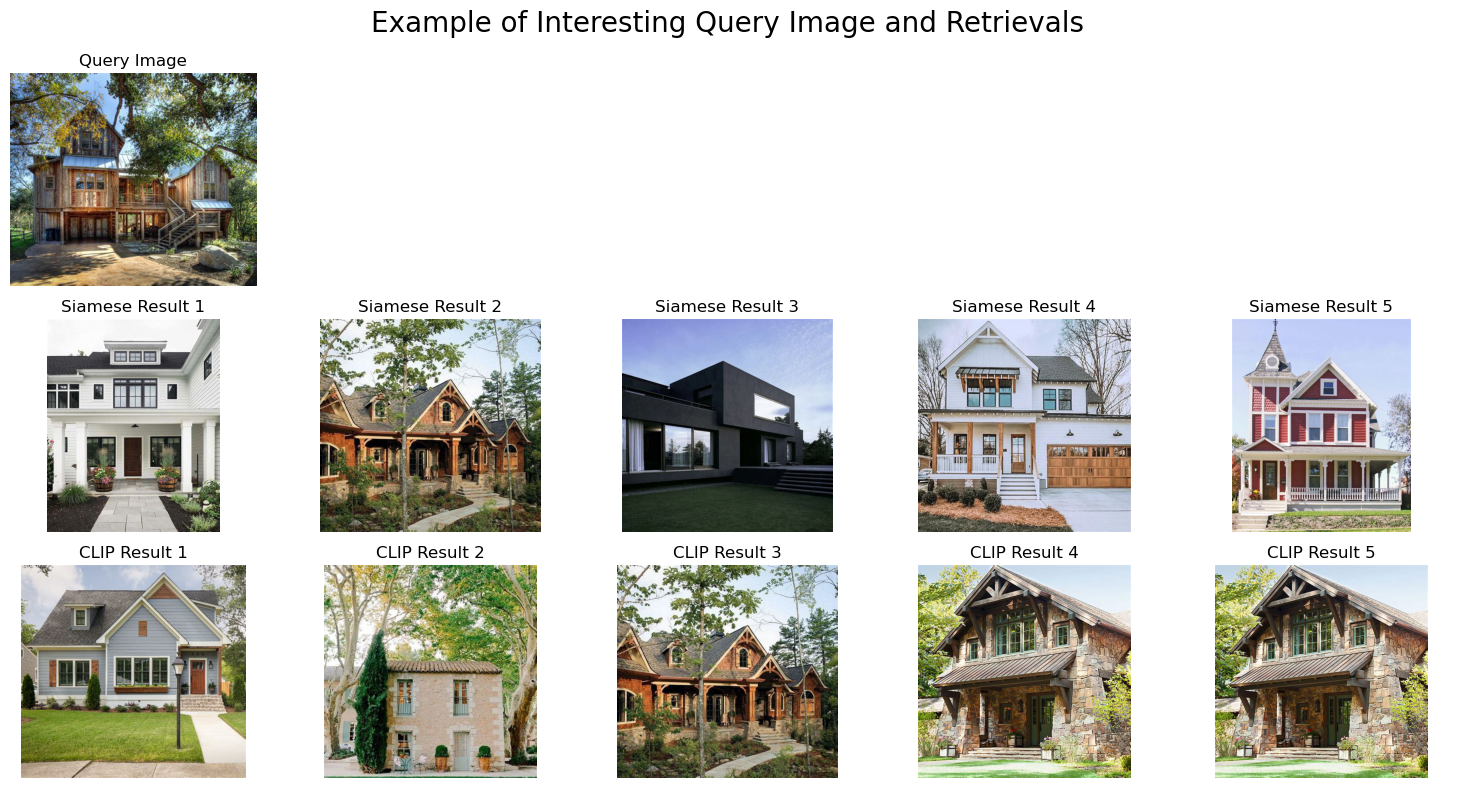

In [23]:
plot_example(9, "Example of Interesting Query Image and Retrievals")